In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('sales_data_with_discounts.csv')
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [31]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [32]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [33]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [34]:
# Calculating mean, median, mode, and standard deviation
meann = df[numerical_cols].mean()
mediann = df[numerical_cols].median()
modee = df[numerical_cols].mode().iloc[0]  #most frequent values..
stdd = df[numerical_cols].std()

print("mean:\n",meann)
print("_____________________________________")
print("median:\n",mediann)
print("_____________________________________")
print("mode:\n",modee)
print("_____________________________________")
print("standard deviation:\n",stdd)

mean:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64
_____________________________________
median:
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64
_____________________________________
mode:
 Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64
_____________________________________
standard deviation:
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Va

Brief Interpretation of Statistical Measures :-


Mean (Average) :
The mean is the average of all values. It’s calculated by adding all values and dividing by the number of values.

Interpretation :
The mean gives a general idea of the central value, but it can be skewed by extreme values (outliers). So, if there are very high or low values, the mean may not reflect the typical data point.

Example :
If the mean sales is 2000, the average sales across all records is 2000 units, but this could be influenced by a few very large sales.



Median (Middle Value) :

The median is the middle value when the data is ordered. If there’s an even number of values, it’s the average of the two middle ones.

Interpretation :
The median is better when the data has outliers or is skewed, as it’s not affected by extreme values. If the mean and median are different, the data might be skewed.

Example :
If the median sales is 1800, half of the sales are below 1800 and half are above, making it a better indicator when there are outliers.


Mode (Most Frequent Value):

The mode is the value that appears most frequently.

Interpretation:
The mode tells you the most common value in the data, helping to identify trends or typical values.

Example:
If the mode is 1500, then 1500 units is the most common sales amount.


Standard Deviation (Measure of Spread):

The standard deviation shows how spread out the data is around the mean. A higher standard deviation means more spread out values.

Interpretation:
A small standard deviation means values are close to the mean, and a large standard deviation indicates more variability.

Example:
If the standard deviation is 500, it means sales vary by 500 units from the average sales of 2000, showing a high level of variability.



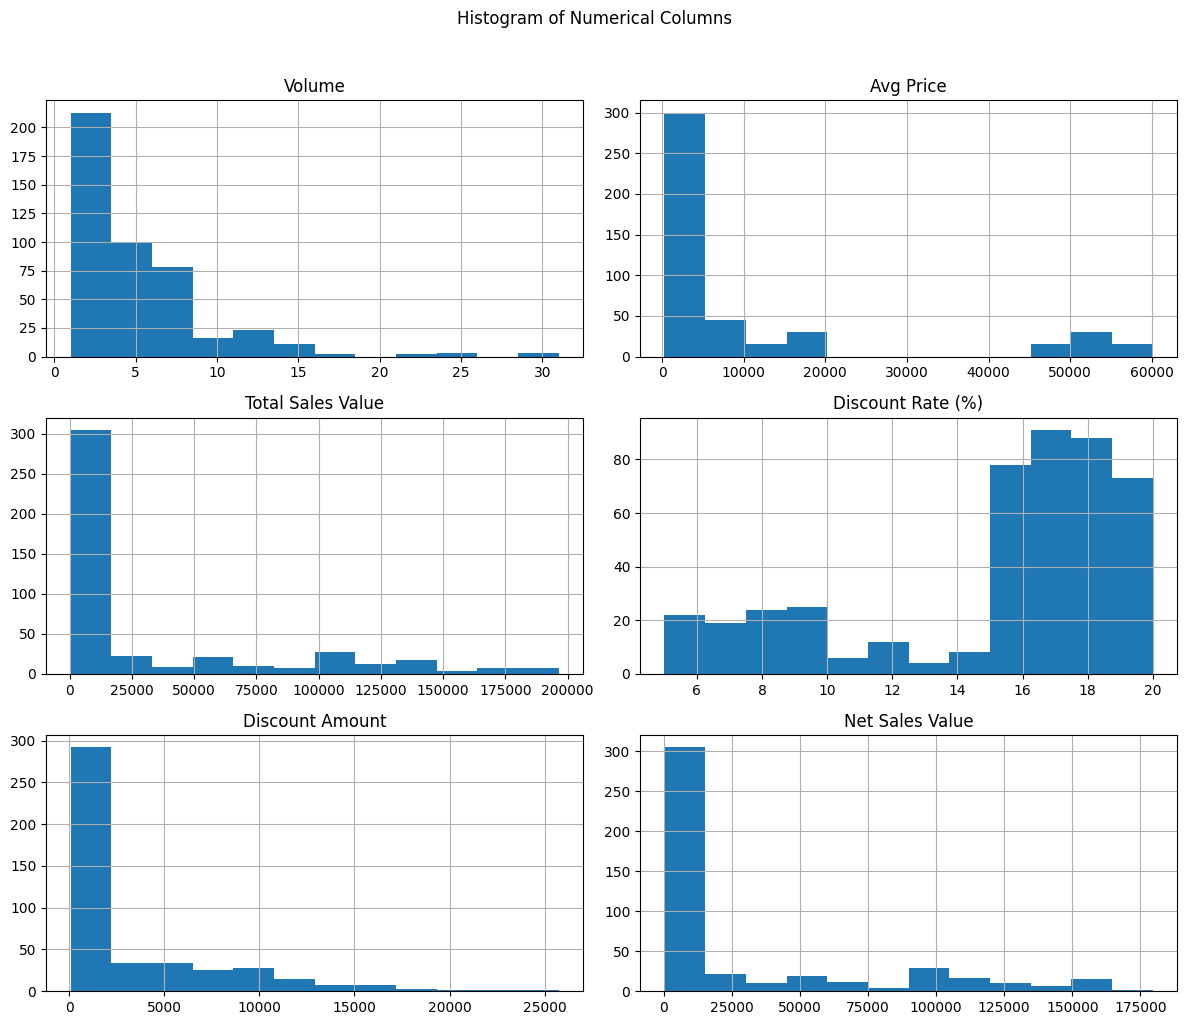

In [36]:
# Data Visualization

###### histogram

df[numerical_cols].hist(bins=12,figsize=(12,10))
plt.suptitle('Histogram of Numerical Columns', y=1.02)
plt.tight_layout()
plt.show()

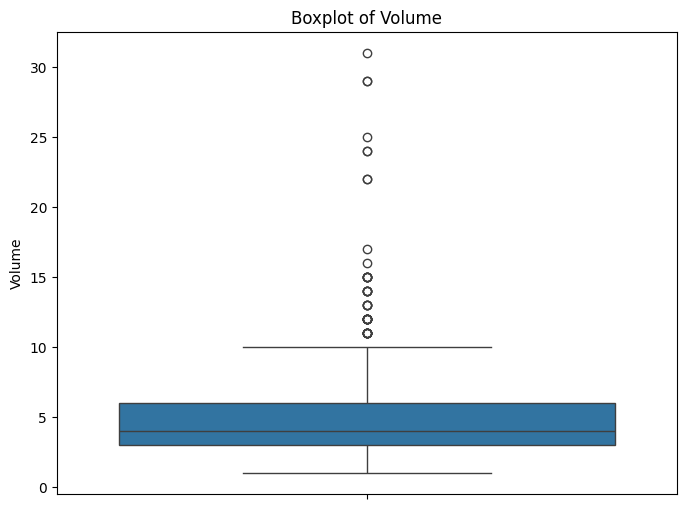

Inter quartile range: 3.0
Volume - Outliers: 44 found


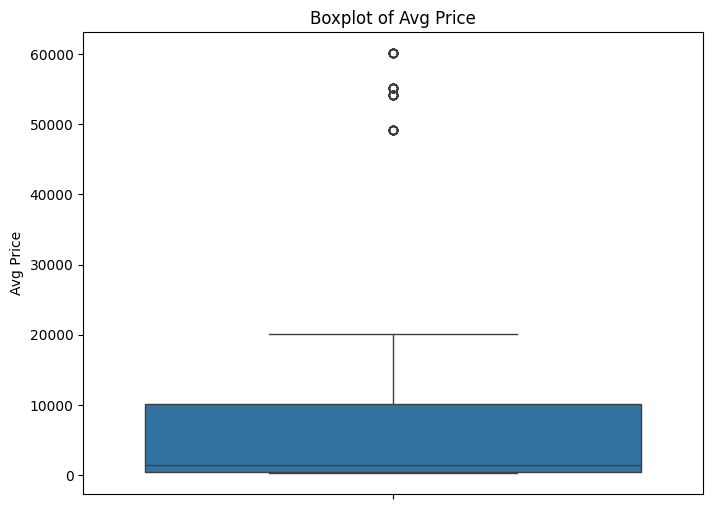

Inter quartile range: 9635.0
Avg Price - Outliers: 60 found


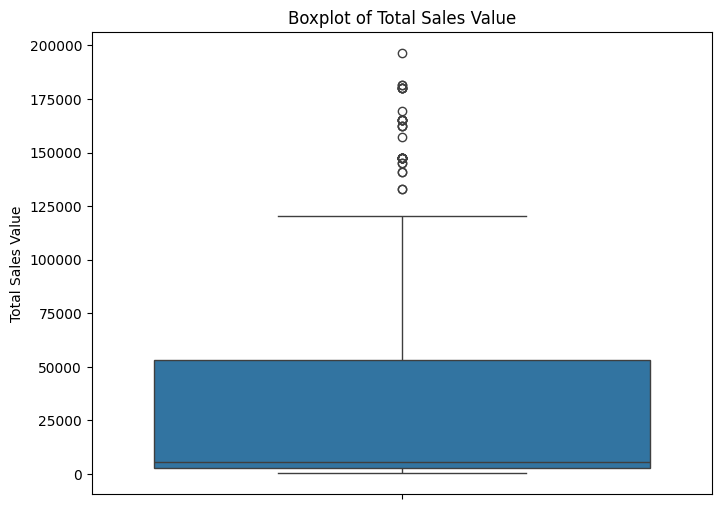

Inter quartile range: 50500.0
Total Sales Value - Outliers: 36 found


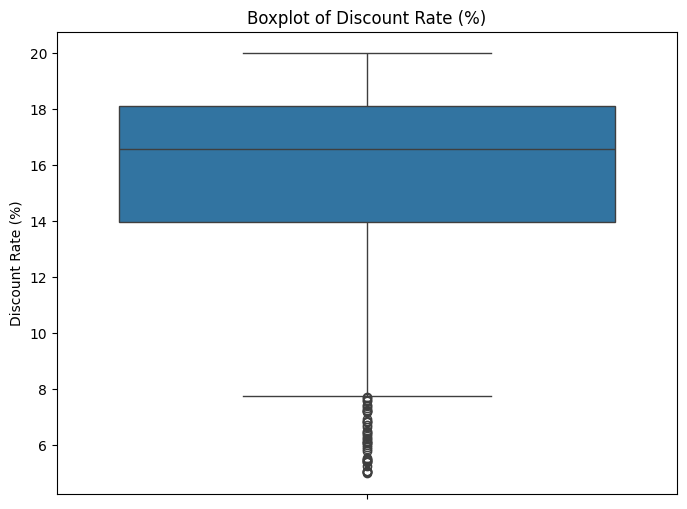

Inter quartile range: 4.149655934050962
Discount Rate (%) - Outliers: 45 found


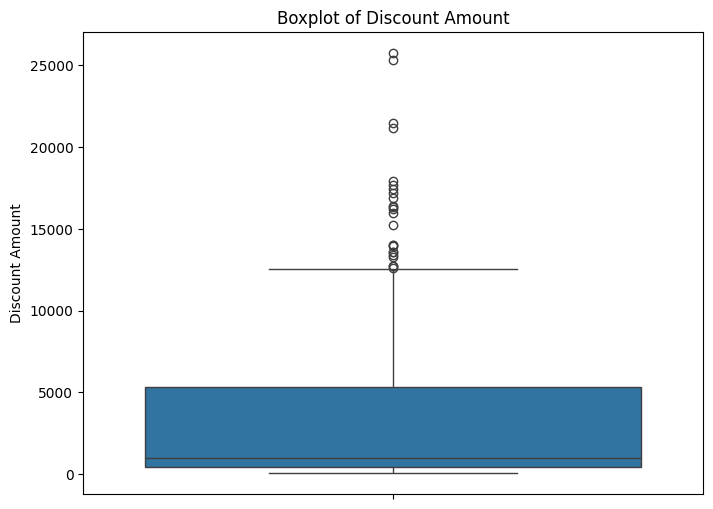

Inter quartile range: 4856.03612280112
Discount Amount - Outliers: 24 found


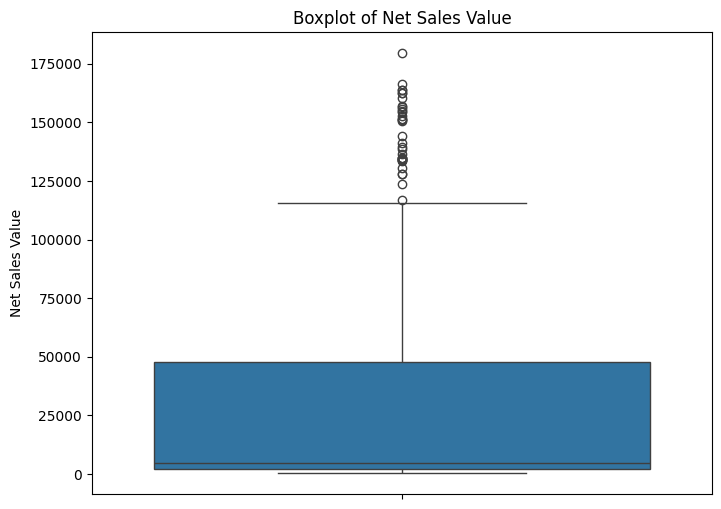

Inter quartile range: 45645.70420627015
Net Sales Value - Outliers: 35 found


In [40]:
######## Box plot

for column in numerical_cols:
    # Create a boxplot for each column
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

    # Calculate IQR and identify outliers
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers

    # Print the Interquartile Range
    print("Inter quartile range:", IQR)

    # Identify and print outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]  # Identify outliers
    print(f"{column} - Outliers: {outliers.shape[0]} found")


Discussion of the findings :-

1. Volume - 44 Outliers :

Findings : The presence of 44 outliers in the 'Volume' column suggests that there are significant deviations in the data. These extreme values could be the result of unusually high or low volumes in some transactions or certain time periods.
Interpretation : Extreme volume values might represent high-demand products or outlier events like bulk sales or promotional offers. On the other hand, very low values could be due to errors or inconsistencies in data entry. The distribution of this column needs careful review, as it could influence any analysis based on average volume.

2. Avg Price - 60 Outliers :

Findings : A higher number of outliers (60) in the 'Avg Price' column indicates large fluctuations in prices. This could be due to irregular pricing strategies or errors in pricing data.

Interpretation : The outliers in 'Avg Price' might be caused by special cases such as limited edition products, bulk discounts, or errors such as data entry mistakes (e.g., a pricing error that led to an extremely high or low price). It's essential to investigate these outliers to ensure they reflect real business cases or are simply errors to be corrected.

3. Total Sales Value - 36 Outliers :

Findings : Outliers in 'Total Sales Value' (36 detected) likely represent extreme total sales transactions, which could arise from unusually large sales or events like sales campaigns.

Interpretation : Outliers in 'Total Sales Value' might suggest that specific transactions have a significant impact on the dataset, especially when combined with extreme volume or high prices. If these outliers are due to legitimate large sales, they may reveal valuable insights. However, if they represent errors or anomalies, they could distort any statistical analysis such as calculating the average sales value.

4. Discount Rate (%) - 45 Outliers :

Findings : The 'Discount Rate (%)' column has 45 outliers, indicating that in some instances, the discounts applied are either unusually high or low compared to the rest of the data.

Interpretation : Large discount percentages could be due to seasonal promotions, special offers, or clearance sales. Extremely low discount rates may also reflect pricing strategies where minimal discounts are offered. High discount rates should be closely examined to ensure they are legitimate promotional activities and not data errors.

5. Discount Amount - 24 Outliers :

Findings : The 'Discount Amount' column has fewer outliers compared to others, with 24 detected. These could be due to large discount amounts applied to high-priced items or specific transactions.

Interpretation : Outliers here might reflect specific instances where high-value discounts were offered . It’s important to evaluate whether these are valid business cases or whether these values need to be investigated for possible errors.


6. Net Sales Value - 35 Outliers :

Findings : Outliers in the 'Net Sales Value' column (35 detected) are likely related to large variations in total sales or volume, and they could be tied to exceptional circumstances such as large bulk sales or special deals.

Interpretation : Outliers in this column could be due to large discounts applied to high-value transactions, or a result of particular promotional offers. Net Sales Value, as it is derived from the combination of 'Volume', 'Avg Price', and 'Discount Rate', could see high variation when there are outlier values in any of these contributing columns. Identifying the cause of these extreme values can help in better understanding sales patterns.

In [41]:
######### Bar chart

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", cat_cols)


Categorical Columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


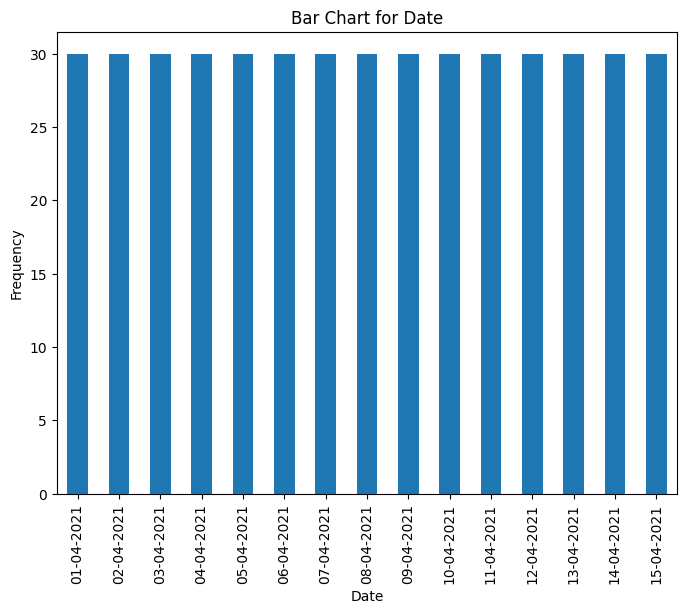

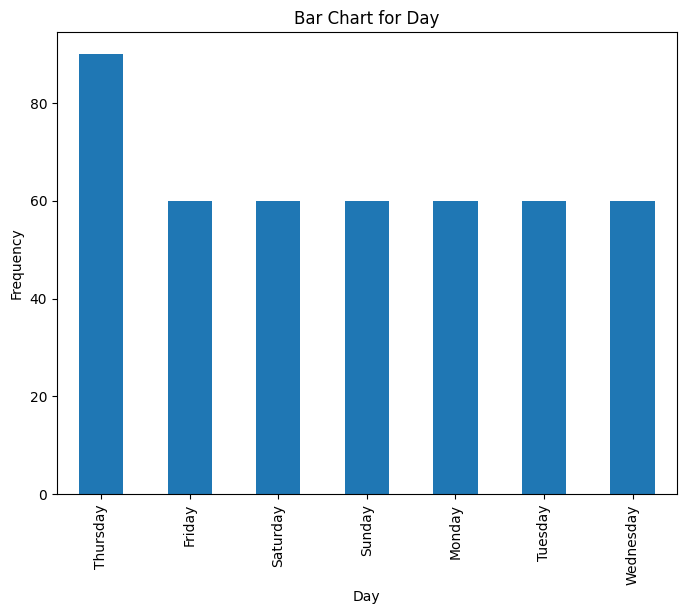

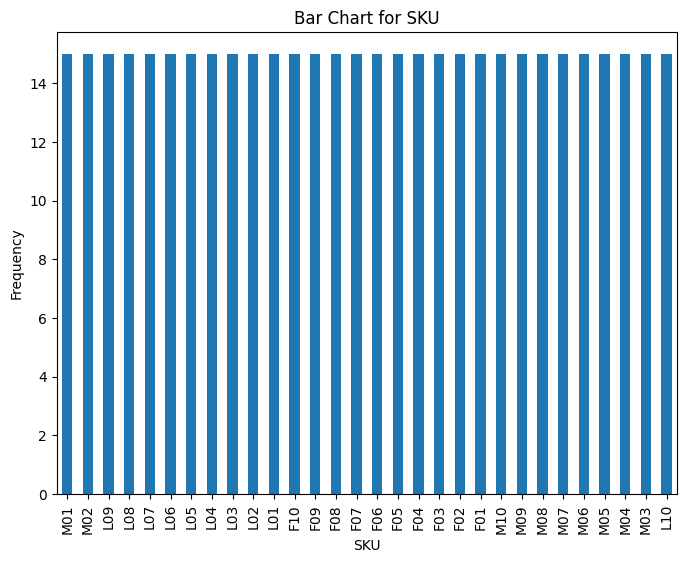

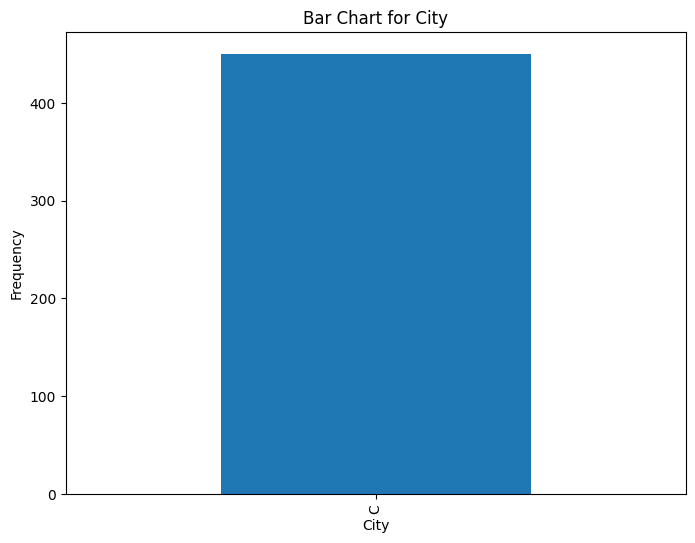

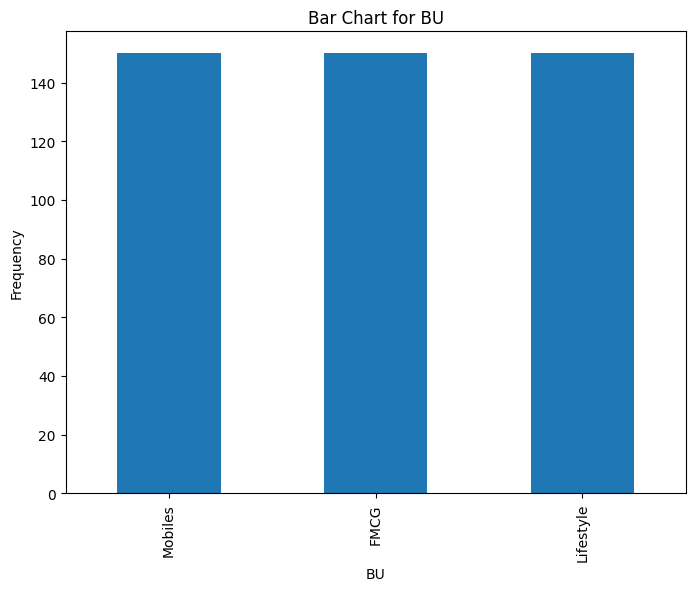

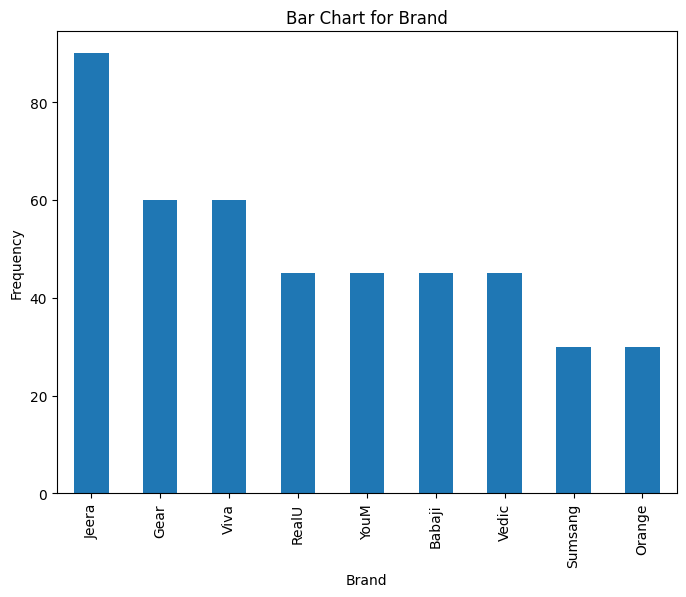

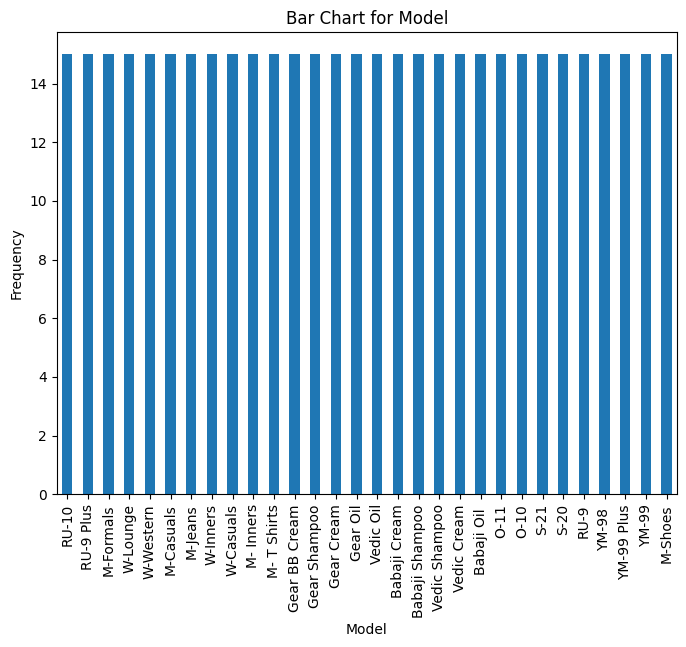

In [43]:
# List of categorical columns
cat_cols
for columns in cat_cols:
    plt.figure(figsize=(8,6))
    df[columns].value_counts().plot(kind='bar')
    plt.title(f"Bar Chart for {columns}")
    plt.xlabel(columns)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
####### Standardization of Numerical Variables

**Explain the concept of standardization (z-score normalization)**

Standardization also known as Z-score normalization, is a technique used to rescale the numerical values of your dataset so that they have the following properties:

Mean = 0 (centering the data around zero).
Standard Deviation = 1 (unit variance).
This is especially important for many machine learning algorithms that are sensitive to the scale of input features, such as k-nearest neighbors (KNN), SVM, and linear models. Standardization ensures that all variables contribute equally to the model and prevents certain variables with larger ranges from dominating the learning process.

Formula for Standardization (Z-score Normalization):
The formula for standardization is:

𝑧
=
𝑥
−
𝜇
𝜎
z=
σ
x−μ
​

Where:

𝑥
x is the original value,
𝜇
μ is the mean of the feature (column),
𝜎
σ is the standard deviation of the feature.

In [45]:
# Standardization of Numerical Variables

standardized_data = (df[numerical_cols] - meann)/stdd
print("Standardized Data:\n",standardized_data.head())

Standardized Data:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.112568   
4 -0.488389  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  
0         2.801638  
1         1.269613  
2         1.543957  
3         1.763847  
4        -0.227342  


In [46]:
##### Conversion of Categorical Data into Dummy Variables

# Conversion of Categorical Data into Dummy Variables
dummy_data = pd.get_dummies(df[cat_cols],drop_first=True)
print("Dummy Variables:")
print(dummy_data.head())

Dummy Variables:
   Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  Date_05-04-2021  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   Date_06-04-2021  Date_07-04-2021  Date_08-04-2021  Date_09-04-2021  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   Date_10-04-2021  Date_11-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False       

In [47]:
# Combining the standardized numerical data with dummy variables

final_data = pd.concat([standardized_data,dummy_data],axis=1)
print("Final Data:")
print(final_data.head())

Final Data:
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.112568   
4 -0.488389  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0         2.801638            False            False            False   
1         1.269613            False            False            False   
2         1.543957            False            False            False   
3         1.763847            False            False            False   
4        -0.227342            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \